In [85]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [65]:
def get_data():
    f = open("data.txt")
    all_data = []
    for l in f:
        vals = [x.strip() for x in l.split('|')]
        all_data.append(vals)
    return all_data

In [66]:
d = get_data()[2:]

In [67]:
class Quiz:
    def __init__(self):
        self.name = ''
        self.time = ''
        self.concepts = []
        self.corr_ques = 0
        self.num_ques = 0

In [68]:
class Session:
    def __init__(self):
        self.name = ''
        self.quizzes = []
    

In [69]:
curr_quiz = Quiz()
quizzes = []
first = True
for row in d:
    if curr_quiz.name != row[0] or curr_quiz.time != row[3]:
        if first:
            first = False
        else:
            quizzes.append(curr_quiz)
        curr_quiz = Quiz()
        curr_quiz.name = row[0]
        curr_quiz.time = row[3]
    curr_quiz.concepts.append((row[1], row[2]))
    curr_quiz.corr_ques += int(row[4])
    curr_quiz.num_ques += int(row[5])

In [122]:
first = True
sessions = []
for q in quizzes:
    if first:
        first = False
        curr_sess = Session()
        curr_sess.name = q.name
        continue
    if (q.name != curr_sess.name) or timedelta(datetime.strptime(q.time, '%m/%d/%Y %H:%M:%S') - datetime.strptime(curr_sess.quizzes[-1].time, '%m/%d/%Y %H:%M:%S') > timedelta(minutes = 15)):
        sessions.append(curr_sess)
        curr_sess = Session()
        curr_sess.name = q.name
    curr_sess.quizzes.append(q)
sessions = sessions[1:]
print("Total number of sessions:", len(sessions))


Total number of sessions: 251


In [86]:
count = 0
t = 0
length_long_sessions = []
for s in sessions:
    if len([q.time for q in s.quizzes]) > 1:
        count += 1
        length_long_sessions.append(len(s.quizzes))
    if len([q.time for q in s.quizzes]) == 1:
        t += 1
        #print(s.quizzes[0].num_ques)
print("Total number of quizzes:", len(quizzes))
print("Number of sessions:", len(sessions))
print("Number of sessions with 2 or more quizzes:", count)
print("Average number of quizzes in sessions with >= 2 quizzes:", sum([len(s.quizzes) for s in sessions])/count)
print("Number of sessions with 1 quiz:", t)
    #print(s.name, [q.time for q in s.quizzes])

Total number of quizzes: 615
Number of sessions: 252
Number of sessions with 2 or more quizzes: 101
Average number of quizzes in sessions with >= 2 quizzes: 6.03960396039604
Number of sessions with 1 quiz: 150


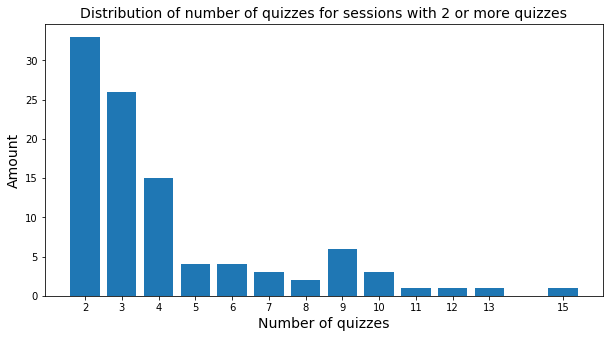

In [106]:
x = sorted(set(length_long_sessions))
x = x[:-1]
y = [length_long_sessions.count(i) for i in x]
plt.figure(figsize=(10,5))
plt.bar(x, y, tick_label = x)
plt.xlabel("Number of quizzes", fontsize = 14)
plt.ylabel("Amount", fontsize = 14)
plt.title("Distribution of number of quizzes for sessions with 2 or more quizzes", fontsize = 14)
plt.show()                                       

In [145]:
before = []
after = []
for s in sessions:
    if len(s.quizzes) > 1:
        before.append(s.quizzes[0].corr_ques/s.quizzes[0].num_ques)
        after.append(s.quizzes[-1].corr_ques/s.quizzes[-1].num_ques)
print("Average score on first quiz:",sum(before)/len(before))
print("Average score on last quiz:", sum(after)/len(after))


Average score on first quiz: 0.7901114069066891
Average score on last quiz: 0.8662316231623161


In [132]:
two_conc = []
one_conc = []
for q in quizzes:
    
    if len(q.concepts) > 1:
        two_conc.append(q)
    else:
        one_conc.append(q)

print("Number of quizzes without interleaving:", len(one_conc))
print("Number of quizzes with interleaving:", len(two_conc))
total = 0
for q in two_conc:
    total += len(q.concepts)
print("Average number of concepts when using interleaving:", total/len(two_conc))

Number of quizzes without interleaving: 367
Number of quizzes with interleaving: 248
Average number of concepts when using interleaving: 5.455645161290323


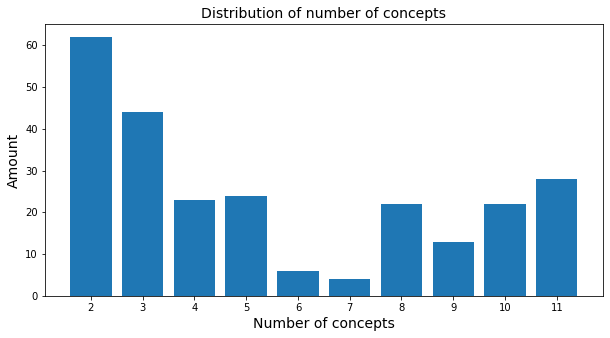

In [147]:
num_conc = []
for q in two_conc:
    num_conc.append(len(q.concepts))
x = sorted(set(num_conc))
y = [num_conc.count(i) for i in x]
plt.figure(figsize=(10,5))
plt.bar(x, y, tick_label = x)
plt.xlabel("Number of concepts", fontsize = 14)
plt.ylabel("Amount", fontsize = 14)
plt.title("Distribution of number of concepts", fontsize = 14)
plt.show()                    

In [144]:
final_score = []
for q in one_conc:
    if q.num_ques > 1:
        final_score.append(q.corr_ques/q.num_ques)
print("Average score without interleaving:",sum(final_score)/len(final_score))

final_score = []
for q in two_conc:
    if q.num_ques > 1:
        final_score.append(q.corr_ques/q.num_ques)
print("Average score with interleaving:",sum(final_score)/len(final_score))



Average score without interleaving: 0.8718213058419247
Average score with interleaving: 0.8297624670654938
